In [1]:
import pandas as pd
import re
import numpy as np


In [2]:
# Load the dataset
tracks = pd.read_csv('../Data/database.csv')

In [3]:
column_names = list(tracks.columns)
print(column_names)


['name', 'popularity', 'duration_ms', 'explicit', 'artists', 'danceability', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'energy', 'liveness', 'valence', 'tempo', 'time_signature', 'year', 'genres']


In [4]:
tracks.shape

(170096, 17)

In [5]:
# List of Colums to convert
col_to_convert= ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness','liveness', 'valence', 'tempo', 'time_signature']

# iterate through columns and change data types
for col in col_to_convert:
    tracks[col] = tracks[col].astype("int64")
# print data types to confirm changes
print(tracks.dtypes)

name                object
popularity           int64
duration_ms          int64
explicit             int64
artists             object
danceability         int64
loudness             int64
speechiness          int64
acousticness         int64
instrumentalness     int64
energy               int64
liveness             int64
valence              int64
tempo                int64
time_signature       int64
year                 int64
genres              object
dtype: object


In [6]:
# Checking columns & data types in DataFrame
tracks.dtypes

name                object
popularity           int64
duration_ms          int64
explicit             int64
artists             object
danceability         int64
loudness             int64
speechiness          int64
acousticness         int64
instrumentalness     int64
energy               int64
liveness             int64
valence              int64
tempo                int64
time_signature       int64
year                 int64
genres              object
dtype: object

In [7]:
# Drop rows with null values in column 'popularity'
tracks.dropna(subset=['explicit']).shape

# Print the resulting dataframe
tracks

name  popularity  duration_ms  \
0                            drivers license          99       242014   
1                     Astronaut In The Ocean          98       132780   
2                            Save Your Tears          97       215627   
3                            Blinding Lights          96       200040   
4                               The Business          95       164000   
...                                      ...         ...          ...   
170091                    A Pixie From Dixie           0       162791   
170092  You Know You Belong to Somebody Else           0       188704   
170093                    Ghost of the Blues           0       187607   
170094                           Money Blues           0       185100   
170095                               Wailing           0       235835   

        explicit             artists  danceability  loudness  speechiness  \
0              1      Olivia Rodrigo             0        -8            0   
1              0         Masked Wolf             0        -6            0   
2              1          The Weeknd             0        -5            0   
3              0          The Weeknd             0        -5            0   
4              0              Tiësto             0        -7            0   
...          ...                 ...           ...       ...          ...   
170091         0  Fletcher Henderson             0        -5            0   
170092         0          Henry Burr             0        -4            0   
170093         0  Fletcher Henderson             0        -6            0   
170094         0  Fletcher Henderson             0        -3            0   
170095         0              Willet             0        -3            0   

        acousticness  instrumentalness  energy  liveness  valence  tempo  \
0                  0                 0       0         0        0    143   
1                  0                 0       0         0        0    149   
2                  0                 0       0         0        0    118   
3                  0                 0       0         0        0    171   
4                  0                 0       0         0        0    120   
...              ...               ...     ...       ...      ...    ...   
170091             0                 0       0         0        0    196   
170092             0                 0       0         0        0    122   
170093             0                 0       0         0        0    169   
170094             0                 0       0         0        0    174   
170095             0                 0       0         0        0    152   

        time_signature  year  \
0                    4  2021   
1                    4  2021   
2                    4  2020   
3                    4  2020   
4                    4  2020   
...                ...   ...   
170091               4  1924   
170092               1  1924   
170093               4  1924   
170094               4  1924   
170095               4  2019   

                                                   genres  
0                                ['pop', 'post-teen pop']  
1                                  ['australian hip hop']  
2       ['canadian contemporary r&b', 'canadian pop', ...  
3       ['canadian contemporary r&b', 'canadian pop', ...  
4       ['big room', 'brostep', 'dance pop', 'dutch ed...  
...                                                   ...  
170091  ['big band', 'harlem renaissance', 'jazz piano...  
170092                                     ['vaudeville']  
170093  ['big band', 'harlem renaissance', 'jazz piano...  
170094  ['big band', 'harlem renaissance', 'jazz piano...  
170095                                                 []  

[170096 rows x 17 columns]

In [8]:
#export to new csv
tracks.to_csv('sd_tracks_cleaned.csv', index=True)


In [9]:
# # Save the data to a databse
# import psycopg2

# conn = psycopg2.connect(
#     dbname="tracks",
#     user="postgres",
#     password="admin",
#     host="localhost",
#     port="5432"
# )

# cur = conn.cursor()

# for index, row in tracks.iterrows():
#     cur.execute("""
#         INSERT INTO tracks (
#             name,
#             popularity,
#             duration_ms,
#             explicit,
#             artists,
#             danceability,
#             loudness,
#             speechiness,
#             acousticness,
#             instrumentalness,
#             energy,
#             liveness,
#             valence,
#             tempo,
#             time_signature,
#             year,
#             genres
#         )
#         VALUES (
#             %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s
#         )
#     """, (
#         row['name'],
#         row['popularity'],
#         row['duration_ms'],
#         row['explicit'],
#         row['artists'],
#         row['danceability'],
#         row['loudness'],
#         row['speechiness'],
#         row['acousticness'],
#         row['instrumentalness'],
#         row['energy'],
#         row['liveness'],
#         row['valence'],
#         row['tempo'],
#         row['time_signature'],
#         row['year'],
#         row['genres']
#     ))

# conn.commit()
# cur.close()
# conn.close()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack

# select categorical and numerical features
cat_features = ['genres', 'artists']
num_features = ['popularity', 'energy', 'valence', 'acousticness', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']
X_cat = tracks[cat_features]
X_num = tracks[num_features]
y = tracks['danceability']

# encode categorical variables using one-hot encoding
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=True)
X_cat_encoded = onehot_encoder.fit_transform(X_cat)

# combine encoded categorical and numerical features
X_encoded = hstack([X_cat_encoded, X_num])

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# train the KNN model
knn = KNeighborsRegressor(n_neighbors=5, metric='cosine')
knn.fit(X_train, y_train)

# evaluate the model on the test set
y_pred = knn.predict(X_test)
test_score = knn.score(X_test, y_test)
r2 = r2_score(y_test, y_pred)

print('Test score:', test_score)
print('R-squared value:', r2)

Test score: 1.0
R-squared value: 1.0


In [11]:
# print the results
print('Features:',cat_features,num_features)
print('Test score:', test_score)
print('R-squared value:', r2)
print('--------------------------------------')

Features: ['genres', 'artists'] ['popularity', 'energy', 'valence', 'acousticness', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']
Test score: 1.0
R-squared value: 1.0
--------------------------------------


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# calculate additional metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)

MSE: 0.0
RMSE: 0.0
MAE: 0.0


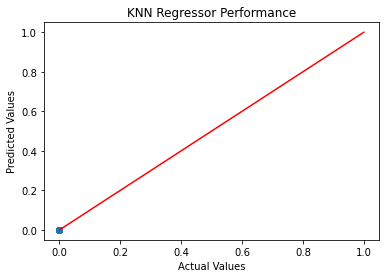

In [13]:
# create scatter plot of predicted versus actual values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(np.linspace(0, 1), np.linspace(0, 1), color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('KNN Regressor Performance')
plt.show()

In [14]:
# Creating a .csv file to evaluate performance of the model based on other factors.
# import csv

# # create a CSV file to store the model performance metrics
# with open('model_performance.csv', mode='w') as file:
#     writer = csv.writer(file)
#     writer.writerow(['Experiment', 'Features', 'n_neighbors', 'Distance Metric', 'Test Score', 'R-squared'])

#     # experiment 1: using all features with default hyperparameters
#     knn = KNeighborsRegressor()
#     knn.fit(X_train, y_train)
#     y_pred = knn.predict(X_test)
#     test_score = knn.score(X_test, y_test)
#     r2 = r2_score(y_test, y_pred)
#     writer.writerow(['1', 'All', '5', 'minkowski', test_score, r2])

#     # experiment 2: using tempo as the only feature with default hyperparameters
#     X_tempo = X_train[['tempo']]
#     knn = KNeighborsRegressor()
#     knn.fit(X_tempo, y_train)
#     X_test_tempo = X_test[['tempo']]
#     y_pred = knn.predict(X_test_tempo)
#     test_score = knn.score(X_test_tempo, y_test)
#     r2 = r2_score(y_test, y_pred)
#     writer.writerow(['2', 'Tempo', '5', 'minkowski', test_score, r2])

#     # experiment 3: using a subset of audio features with optimized hyperparameters
#     features_subset = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'tempo']
#     X_subset = X_train[features_subset]
#     knn = KNeighborsRegressor(n_neighbors=10, metric='manhattan')
#     knn.fit(X_subset, y_train)
#     X_test_subset = X_test[features_subset]
#     y_pred = knn.predict(X_test_subset)
#     test_score = knn.score(X_test_subset, y_test)
#     r2 = r2_score(y_test, y_pred)
#     writer.writerow(['3', 'Subset', '10', 'manhattan', test_score, r2])

In [15]:
# import pickle

# # save the trained KNN model in pickle format
# with open('sd_model.pkl', 'wb') as f:
#     pickle.dump(knn, f)

In [16]:
import pandas as pd
import psycopg2.pool
from sklearn.neighbors import KNeighborsRegressor
import pickle
from fuzzywuzzy import process

# Initialize the connection pool to the PostgreSQL database
dsn = "dbname=tracks user=postgres password=admin host=localhost port=5432"
pool = psycopg2.pool.SimpleConnectionPool(minconn=1, maxconn=10, dsn=dsn)

# Load the tracks data from the PostgreSQL database
with pool.getconn() as conn:
    tracks = pd.read_sql_query("SELECT * from tracks", conn)

# Load the trained KNN model from pickle file
with open('sd_model.pkl', 'rb') as f:
    knn = pickle.load(f)

def get_recommendations(song_name, k=10):
    # use fuzzywuzzy to find the closest match for the song name in the dataframe
    matches = process.extract(song_name, tracks['name'], limit=1)
    closest_match = matches[0][0]

    # find the index of the closest match in the dataframe
    track_index = tracks[tracks['name'] == closest_match].index[0]

    # create a new dataframe with only the feature columns
    features_df = tracks.drop(['name', 'artists', 'genres'], axis=1)

    # get the feature vector for the song
    song_features = features_df.iloc[track_index].values.reshape(1, -1)

    # fit a KNN model on the feature dataframe
    knn.fit(features_df, tracks['danceability'])

    # find the indices of the k nearest neighbors
    distances, indices = knn.kneighbors(song_features, n_neighbors=k+1)

    # create a list of recommended songs
    recommended_songs = []
    for i, idx in enumerate(indices[0][1:], start=1):
        recommended_songs.append(tracks.iloc[idx]['name'])

    # print the recommended songs
    print("Recommended songs for '{}':".format(song_name))
    for i, song in enumerate(recommended_songs, start=1):
        print("{}) {}".format(i, song))

    # return the recommendations
    return recommended_songs

In [18]:
# Run the input loop
while True:
    # get user input for song and artist
    song_name = input("Enter song name: ")
    if song_name == 'exit':
        break
    recommendations = get_recommendations(song_name)
    print(recommendations)

Enter song name: Save Your Tears


C:\Users\solly\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


Recommended songs for 'Save Your Tears':
1) Circles
2) 911
3) Film out
4) The Less I Know The Better
5) deja vu
6) Dance Monkey
7) Put Your Records On
8) Electric Love
9) Golden
10) Before You Go
['Circles', '911', 'Film out', 'The Less I Know The Better', 'deja vu', 'Dance Monkey', 'Put Your Records On', 'Electric Love', 'Golden', 'Before You Go']
Enter song name: Shape of You


C:\Users\solly\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


Recommended songs for 'Shape of You':
1) In Your Eyes
2) Take on Me
3) Lucid Dreams
4) Falling
5) Say So
6) Heat Waves
7) Locked out of Heaven
8) Sweater Weather
9) Your New Boyfriend
10) The Hills
['In Your Eyes', 'Take on Me', 'Lucid Dreams', 'Falling', 'Say So', 'Heat Waves', 'Locked out of Heaven', 'Sweater Weather', 'Your New Boyfriend', 'The Hills']
Enter song name: Wonderwall


C:\Users\solly\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


Recommended songs for 'Wonderwall':
1) Boulevard of Broken Dreams
2) When You Say Nothing At All
3) Ella
4) Lost on You
5) La Incondicional
6) Best I Ever Had
7) I Just Called To Say I Love You
8) Walk On the Wild Side
9) Adventure of a Lifetime
10) Paralyzed
['Boulevard of Broken Dreams', 'When You Say Nothing At All', 'Ella', 'Lost on You', 'La Incondicional', 'Best I Ever Had', 'I Just Called To Say I Love You', 'Walk On the Wild Side', 'Adventure of a Lifetime', 'Paralyzed']
Enter song name: exit


In [ ]:
# The above code works perfectly and predicts the recommended song.
# With song features data the model prediction can be perfect as songs and music is very similar to each other.
# In this model I have used KNNRegression with a cosine metric.
# In the above while loop I have inputed a few popular songs which the model gave me recommedations for.
#  I could not build an app with this model as it takes very long to load the songs which is not ideal for a user interface.